<a href="https://colab.research.google.com/github/bualinizami/CODSOFT/blob/main/CodSoft_Spam_SMS_Task04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Liberaries

In [2]:
# Lets start the code by importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

#Importing the Data Set with appropriate encoding format

In [7]:
# Import Dataset while specifying appropriate encoding format
df = pd.read_csv('/content/spam.csv',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
# Check the size
df.shape

(5572, 5)

In [9]:
# Basic info on data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#Data Cleaning and Preprocessing

In [10]:
# Checking for nan values

df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [11]:
# Removing the Null Column
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"] ,axis = 1 ,inplace = True)
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.shape

(5572, 2)

In [13]:
# Checking for Duplicates and Removing them
df.duplicated().sum()

403

In [15]:
df.drop_duplicates(inplace = True)

In [16]:
df.shape

(5169, 2)

In [17]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
#Rename the column
df.rename(columns = {"v1":"Target","v2":"SMS"} ,inplace = True)
df.head()

,Target,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## String to Numeric

In [19]:
#Converting "Target" from String to Nummeric
df['Group'] = df['Target'].apply(lambda x : 1 if x== 'spam' else 0)
df.head()

,Target,SMS,Group
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## Data Splitting

In [20]:
## Split the data
x = df["SMS"]
y = df["Group"]

#Training the Model Using TF-IDF Vectorization Technique

In [21]:
## Using TfidfVectorizer technique
vectorizer = TfidfVectorizer()
x_trans= vectorizer.fit_transform(x)


x_train ,x_test ,y_train ,y_test = train_test_split(x_trans ,y ,test_size = 0.3 ,random_state = 42)

In [22]:
print("x train ",x_train.shape )
print("x_test" ,x_test.shape)
print("y_train" ,y_train.shape)
print("y test" ,y_test.shape)

x train  (3618, 8672)
x_test (1551, 8672)
y_train (3618,)
y test (1551,)


##Multinomial Naive Bayes classifier

In [23]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

# Evaluate the model
train_accuracy = mnb.score(x_train, y_train)
test_accuracy = mnb.score(x_test, y_test)

# Print model accuracy
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions and display classification report
y_pred = mnb.predict(x_test)
class_report = classification_report(y_test, y_pred)

print("Classification Report:\n", class_report)

Training Accuracy: 0.96
Test Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1331
           1       1.00      0.62      0.77       220

    accuracy                           0.95      1551
   macro avg       0.97      0.81      0.87      1551
weighted avg       0.95      0.95      0.94      1551



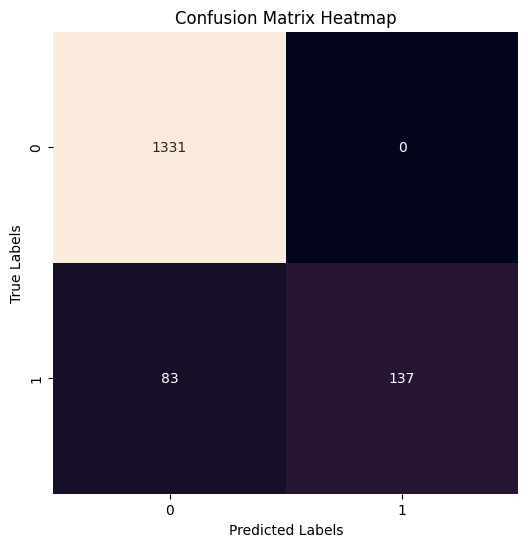

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

##LogisticRegression

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train ,y_train)
print("Model Score on Training data",model.score(x_train ,y_train))
print("Model Score on Testing data",model.score(x_test ,y_test))
y_pred = model.predict(x_test)
print(classification_report(y_pred ,y_test))

Model Score on Training data 0.9662797125483693
Model Score on Testing data 0.9529335912314636
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1398
           1       0.68      0.98      0.80       153

    accuracy                           0.95      1551
   macro avg       0.84      0.97      0.89      1551
weighted avg       0.97      0.95      0.96      1551



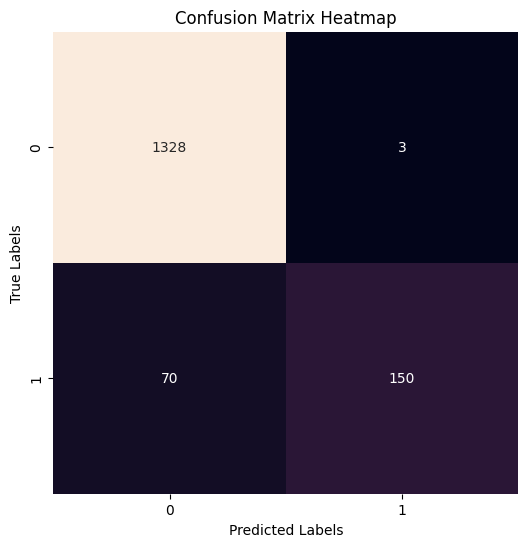

In [34]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

##Support Vector Machine ( SVC )

In [35]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(x_train ,y_train)
print("Model Score on Training data",svm.score(x_train ,y_train))
print("Model Score on Testing data",svm.score(x_test ,y_test))
y_pred = svm.predict(x_test)
print(classification_report(y_pred ,y_test))

Model Score on Training data 0.9997236042012161
Model Score on Testing data 0.9813023855577047
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1352
           1       0.89      0.98      0.93       199

    accuracy                           0.98      1551
   macro avg       0.94      0.98      0.96      1551
weighted avg       0.98      0.98      0.98      1551



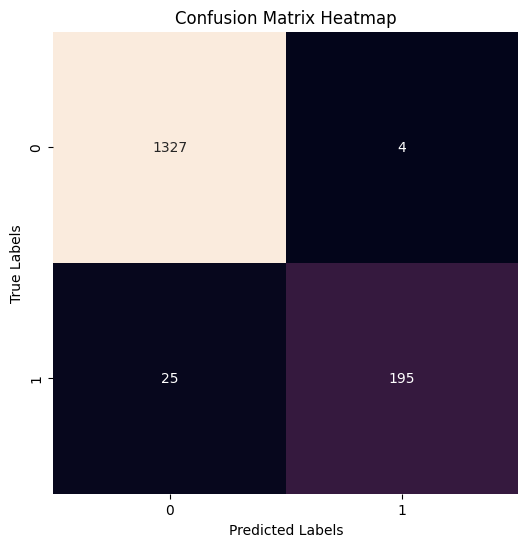

In [36]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

#Conclusion:
###The **Support Vector Machine (SVC)** model stands out as the best choice for spam SMS detection